In [1]:
# IMPORT TWITTER
import twitter
# IMPORT JSON (c.f. 3.)
import json
# IMPORT COUNTER
from collections import Counter # (c.f. 7.)
# IMPORT PRETTYTABLE
from prettytable import PrettyTable # (c.f. 8.)
# IMPORT MATH
from math import log # (c.f. 14.)
# IMPORT MATPLOTLIB
import matplotlib.pyplot as plt
# GESTION DES CERTIFICATS SSL
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Gestion configparser
import configparser

In [2]:
# Gestion de la configuration
config = configparser.ConfigParser()
config.read('../Configuration.conf')

['../Configuration.conf']

In [3]:
# Obtention de mes identifiants Twitter
ma_consumer_key = config.get('Twitter', 'consumer_key')
ma_consumer_secret = config.get('Twitter', 'consumer_secret')
ma_Oauth_token = config.get('Twitter', 'Oauth_token')
ma_Oauth_token_secret = config.get('Twitter', 'Oauth_token_secret')

In [4]:
# ?!? Import unquote to prevent url encoding errors in next_results (c.f. 5.)
#from urllib import unquote

In [5]:
# 1. Authorizing an application to access Twitter account data

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

auth = twitter.oauth.OAuth(ma_Oauth_token, ma_Oauth_token_secret,
                           ma_consumer_key, ma_consumer_secret)

twitter_api = twitter.Twitter(auth = auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print (twitter_api)

In [6]:
# 2. Retrieving trends

# The Yahoo! Where On Earth ID for the entire world is 1.# The Y 
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print (world_trends)

[{'trends': [{'name': '#AvangersEndgame', 'url': 'http://twitter.com/search?q=%23AvangersEndgame', 'promoted_content': None, 'query': '%23AvangersEndgame', 'tweet_volume': 64732}, {'name': '#FelizMiércoles', 'url': 'http://twitter.com/search?q=%23FelizMi%C3%A9rcoles', 'promoted_content': None, 'query': '%23FelizMi%C3%A9rcoles', 'tweet_volume': 30155}, {'name': '#WednesdayWisdom', 'url': 'http://twitter.com/search?q=%23WednesdayWisdom', 'promoted_content': None, 'query': '%23WednesdayWisdom', 'tweet_volume': 54405}, {'name': '#シャニマス生配信', 'url': 'http://twitter.com/search?q=%23%E3%82%B7%E3%83%A3%E3%83%8B%E3%83%9E%E3%82%B9%E7%94%9F%E9%85%8D%E4%BF%A1', 'promoted_content': None, 'query': '%23%E3%82%B7%E3%83%A3%E3%83%8B%E3%83%9E%E3%82%B9%E7%94%9F%E9%85%8D%E4%BF%A1', 'tweet_volume': 48986}, {'name': '#CananınCHPpolitikası', 'url': 'http://twitter.com/search?q=%23Canan%C4%B1nCHPpolitikas%C4%B1', 'promoted_content': None, 'query': '%23Canan%C4%B1nCHPpolitikas%C4%B1', 'tweet_volume': None}, {'na

In [7]:
print (us_trends)

[{'trends': [{'name': '#WednesdayWisdom', 'url': 'http://twitter.com/search?q=%23WednesdayWisdom', 'promoted_content': None, 'query': '%23WednesdayWisdom', 'tweet_volume': 53545}, {'name': '#WednesdayMotivation', 'url': 'http://twitter.com/search?q=%23WednesdayMotivation', 'promoted_content': None, 'query': '%23WednesdayMotivation', 'tweet_volume': 25272}, {'name': '#AdminProfessionalsDay', 'url': 'http://twitter.com/search?q=%23AdminProfessionalsDay', 'promoted_content': None, 'query': '%23AdminProfessionalsDay', 'tweet_volume': None}, {'name': '#WhenIThrowAParty', 'url': 'http://twitter.com/search?q=%23WhenIThrowAParty', 'promoted_content': None, 'query': '%23WhenIThrowAParty', 'tweet_volume': None}, {'name': '#wednesdaythoughts', 'url': 'http://twitter.com/search?q=%23wednesdaythoughts', 'promoted_content': None, 'query': '%23wednesdaythoughts', 'tweet_volume': 11409}, {'name': 'Steve King', 'url': 'http://twitter.com/search?q=%22Steve+King%22', 'promoted_content': None, 'query': '%

In [8]:
# 3. Displaying API responses as pretty-printed JSON
print (json.dumps(world_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#AvangersEndgame",
    "url": "http://twitter.com/search?q=%23AvangersEndgame",
    "promoted_content": null,
    "query": "%23AvangersEndgame",
    "tweet_volume": 64732
   },
   {
    "name": "#FelizMi\u00e9rcoles",
    "url": "http://twitter.com/search?q=%23FelizMi%C3%A9rcoles",
    "promoted_content": null,
    "query": "%23FelizMi%C3%A9rcoles",
    "tweet_volume": 30155
   },
   {
    "name": "#WednesdayWisdom",
    "url": "http://twitter.com/search?q=%23WednesdayWisdom",
    "promoted_content": null,
    "query": "%23WednesdayWisdom",
    "tweet_volume": 54405
   },
   {
    "name": "#\u30b7\u30e3\u30cb\u30de\u30b9\u751f\u914d\u4fe1",
    "url": "http://twitter.com/search?q=%23%E3%82%B7%E3%83%A3%E3%83%8B%E3%83%9E%E3%82%B9%E7%94%9F%E9%85%8D%E4%BF%A1",
    "promoted_content": null,
    "query": "%23%E3%82%B7%E3%83%A3%E3%83%8B%E3%83%9E%E3%82%B9%E7%94%9F%E9%85%8D%E4%BF%A1",
    "tweet_volume": 48986
   },
   {
    "name": "#Canan\u0131nCHPpolitika

In [9]:
print (json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#WednesdayWisdom",
    "url": "http://twitter.com/search?q=%23WednesdayWisdom",
    "promoted_content": null,
    "query": "%23WednesdayWisdom",
    "tweet_volume": 53545
   },
   {
    "name": "#WednesdayMotivation",
    "url": "http://twitter.com/search?q=%23WednesdayMotivation",
    "promoted_content": null,
    "query": "%23WednesdayMotivation",
    "tweet_volume": 25272
   },
   {
    "name": "#AdminProfessionalsDay",
    "url": "http://twitter.com/search?q=%23AdminProfessionalsDay",
    "promoted_content": null,
    "query": "%23AdminProfessionalsDay",
    "tweet_volume": null
   },
   {
    "name": "#WhenIThrowAParty",
    "url": "http://twitter.com/search?q=%23WhenIThrowAParty",
    "promoted_content": null,
    "query": "%23WhenIThrowAParty",
    "tweet_volume": null
   },
   {
    "name": "#wednesdaythoughts",
    "url": "http://twitter.com/search?q=%23wednesdaythoughts",
    "promoted_content": null,
    "query": "%23wednesdaythoughts",
 

In [10]:
# 4. Computing the intersection of two sets of trends
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print (common_trends)

{'#WednesdayWisdom', '#AdminProfessionalsDay', 'Persona 5 The Royal', '#ArmenianGenocide', '#WhenIThrowAParty', 'Eric Cantona', '#ManchesterDerby', '#WednesdayMotivation', '#NKOTBDay'}


In [11]:
# 5. Collecting search results

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#FiersdetreBleus' #MentionSomeoneImportantForYou' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q = q, count = count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print ("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except:# KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    #kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print (json.dumps(statuses[0], indent=1))

Length of statuses 91
Length of statuses 169
Length of statuses 169
{
 "created_at": "Wed Apr 24 11:49:31 +0000 2019",
 "id": 1121018325822312450,
 "id_str": "1121018325822312450",
 "text": "RT @ladeuxiemetoile: La France est championne du monde depuis 283 jours. #FiersdetreBleus\n\n                        \u26aa\n         \ud83d\udd35    \u26aa\u26aa\u26aa\ud83d\udd34\n\ud83d\udd35\ud83d\udd35\ud83d\udd35\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "FiersdetreBleus",
    "indices": [
     73,
     89
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "ladeuxiemetoile",
    "name": "La Deuxi\u00e8me \u00c9toile \u2b50\u2b50",
    "id": 1022610332202815493,
    "id_str": "1022610332202815493",
    "indices": [
     3,
     19
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "fr",
  "result_type": "recent"
 },
 "source": "<a href=\"https://twitter.com/BotEuro2016\" rel=\"nofollow\">Bot Twitter EURO2016</a>"

In [12]:
## ?!?
#statuses = json.loads(open('resources/ch01-twitter/data/Shakira.json').read())
#
## The result of the list comprehension is a list with only one element that
## can be accessed by its index and set to the variable t
#t = [ status 
#      for status in statuses
#          if status['id'] == 316948241264549888 ][0]
#
## Explore the variable t to get familiarized with the data structure...
#
#print (t['retweet_count'])
#print (t['retweeted_status'])
#
## Can you find the most retweeted tweet in your search results? Try do do it!

In [13]:
# 6. Extracting text, screen names, and hashtags from tweets

status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1))
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

[
 "RT @ladeuxiemetoile: La France est championne du monde depuis 283 jours. #FiersdetreBleus\n\n                        \u26aa\n         \ud83d\udd35    \u26aa\u26aa\u26aa\ud83d\udd34\n\ud83d\udd35\ud83d\udd35\ud83d\udd35\u2026",
 "La France est championne du monde depuis 283 jours. #FiersdetreBleus\n\n                        \u26aa\n         \ud83d\udd35    \u26aa\u26aa\u26aa\ud83d\udd34\u2026 https://t.co/jPZY1bz78C",
 "RT @InfoProNetwork: IAM Platform Curated Retweet:\n\nVia: https://t.co/zmvVdUIsqY\n\nRemyChalle EdtechFrance qui ne saute pas n'est pas #EdTech\u2026",
 "IAM Platform Curated Retweet:\n\nVia: https://t.co/zmvVdUIsqY\n\nRemyChalle EdtechFrance qui ne saute pas n'est pas\u2026 https://t.co/28oELZbKKV",
 "RT @TeachReo: @RemyChalle @EdtechFrance qui ne saute pas n'est pas #EdTech ... #fiersdetrebleus stickers bien re\u00e7us \ud83d\ude0a merci https://t.co/OM\u2026"
]
[
 "ladeuxiemetoile",
 "InfoProNetwork",
 "TeachReo",
 "RemyChalle",
 "EdtechFrance"
]
[
 "FiersdetreBle

In [14]:
# 7. Creating a basic frequency distribution from the words in tweets

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10

[('et', 201), ('RT', 156), ('de', 112), ('pour', 106), ('à', 105), ('le', 104), ('la', 103), ('@equipedefrance:', 101), ('Pour', 101), ('les', 101)]
[('equipedefrance', 114), ('nglkante', 100), ('FFF', 97), ('AntoGriezmann', 97), ('samumtiti', 97), ('paulpogba', 9), ('ladeuxiemetoile', 6), ('MATUIDIBlaise', 6), ('RemyChalle', 5), ('EdtechFrance', 5)]
[('fiersdetrebleus', 28), ('FiersdetreBleus', 25), ('EdTech', 6), ('Bleus', 3), ('foot', 3), ('football', 3), ('coupedumondefeminin', 3), ('coupedumonde', 3), ('fifawomensworldcup', 3), ('fiersdetrebleues', 3)]


In [15]:
# 8. Using prettytable to display tuples in a nice tabular format

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

+------------------+-------+
| Word             | Count |
+------------------+-------+
| et               |   201 |
| RT               |   156 |
| de               |   112 |
| pour             |   106 |
| à                |   105 |
| le               |   104 |
| la               |   103 |
| @equipedefrance: |   101 |
| Pour             |   101 |
| les              |   101 |
+------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| equipedefrance  |   114 |
| nglkante        |   100 |
| FFF             |    97 |
| AntoGriezmann   |    97 |
| samumtiti       |    97 |
| paulpogba       |     9 |
| ladeuxiemetoile |     6 |
| MATUIDIBlaise   |     6 |
| RemyChalle      |     5 |
| EdtechFrance    |     5 |
+-----------------+-------+
+---------------------+-------+
| Hashtag             | Count |
+---------------------+-------+
| fiersdetrebleus     |    28 |
| FiersdetreBleus     |    25 |
| EdTech              |     6 |
| Bleus   

In [16]:
# 9. Calculating lexical diversity for tweets

# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0 * len(set(tokens)) / len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print (lexical_diversity(words))
print (lexical_diversity(screen_names))
print (lexical_diversity(hashtags))
print (average_words(status_texts))

0.11720397710153661
0.07154742096505824
0.288135593220339
19.63905325443787


In [17]:
# 10. Finding the most popular retweets

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
                #if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

+--------+-------------+----------------------------------------------------+
| Count  | Screen Name | Text                                               |
+--------+-------------+----------------------------------------------------+
| 100062 | nglkante    | RT @nglkante: World Champion 👍🏽                    |
|        |             | #fiersdetrebleus 🇫🇷                                |
|        |             | 🔵⚪️🔴 https://t.co/eIwEqgFrzb                       |
| 100062 | nglkante    | RT @nglkante: World Champion 👍🏽                    |
|        |             | #fiersdetrebleus 🇫🇷                                |
|        |             | 🔵⚪️🔴 https://t.co/eIwEqgFrzb                       |
| 100062 | nglkante    | RT @nglkante: World Champion 👍🏽                    |
|        |             | #fiersdetrebleus 🇫🇷                                |
|        |             | 🔵⚪️🔴 https://t.co/eIwEqgFrzb                       |
| 47929  | paulpogba   | RT @paulpogba: Papa et maman c’est pour

In [18]:
# 11. Looking up users who have retweeted a status

# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print ([r['user']['screen_name'] for r in _retweets])

['melissacaaag', 'jyeee', 'Ceejaynatics', 'LoveKyana18', 'AileenPangan', 'kidamgos', 'asdfghjbl', 'josellexseraspi', 'anneyyeong']


Text(0.5, 0, 'Word Rank')

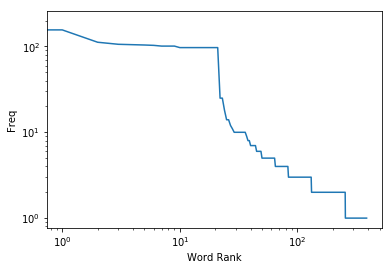

In [19]:
# 12. Plotting frequencies of words

word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

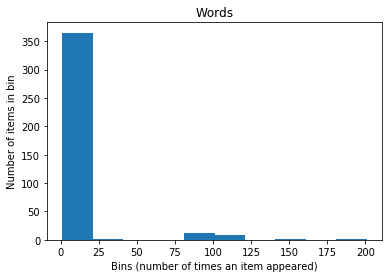

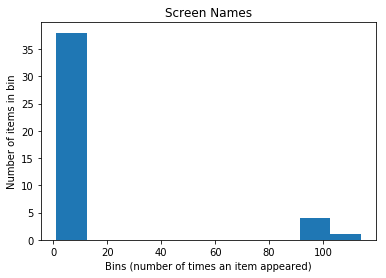

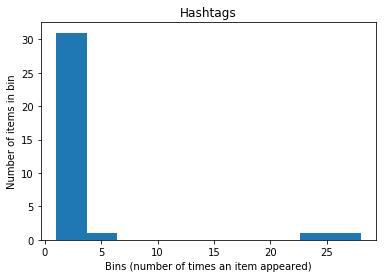

<Figure size 432x288 with 0 Axes>

In [20]:
# 13. Generating histograms of words, screen names, and hashtags

for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

[2, 1, 4, 4, 4, 4, 413, 2, 2, 100062, 3030, 5, 528, 413, 5, 1934, 413, 413, 3, 413, 1, 64, 64, 3, 3, 413, 1, 413, 23385, 5, 5, 413, 1335, 413, 6, 413, 84, 413, 413, 73, 413, 47929, 413, 413, 47929, 100062, 47929, 10191, 3030, 3030, 10191, 47929, 100062, 4546, 9333, 1467, 413, 413, 413, 413, 413, 413, 4362, 413, 413, 413, 413, 16, 413, 2034, 2034, 9, 9, 3522, 413, 413, 413, 413, 413, 413, 1335, 1, 1, 16, 413, 413, 413, 413, 413, 413, 2, 2, 413, 413, 413, 1, 413, 413, 413, 413, 413, 413, 413, 94, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 3, 3, 413, 16, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413, 413]


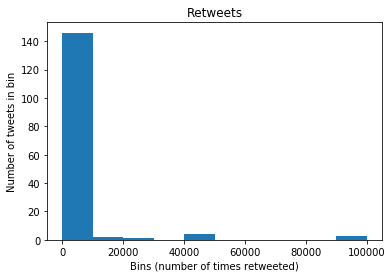

In [21]:
# 14. Generating a histogram of retweet counts

# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print (counts)

[0.6931471805599453, 0.0, 1.3862943611198906, 1.3862943611198906, 1.3862943611198906, 1.3862943611198906, 6.023447592961033, 0.6931471805599453, 0.6931471805599453, 11.513545272849635, 8.016317898503415, 1.6094379124341003, 6.269096283706261, 6.023447592961033, 1.6094379124341003, 7.56734567601324, 6.023447592961033, 6.023447592961033, 1.0986122886681098, 6.023447592961033, 0.0, 4.1588830833596715, 4.1588830833596715, 1.0986122886681098, 1.0986122886681098, 6.023447592961033, 0.0, 6.023447592961033, 10.059850070159987, 1.6094379124341003, 1.6094379124341003, 6.023447592961033, 7.19668657083435, 6.023447592961033, 1.791759469228055, 6.023447592961033, 4.430816798843313, 6.023447592961033, 6.023447592961033, 4.290459441148391, 6.023447592961033, 10.777476028176377, 6.023447592961033, 6.023447592961033, 10.777476028176377, 11.513545272849635, 10.777476028176377, 9.229260256828693, 8.016317898503415, 8.016317898503415, 9.229260256828693, 10.777476028176377, 11.513545272849635, 8.4220030044

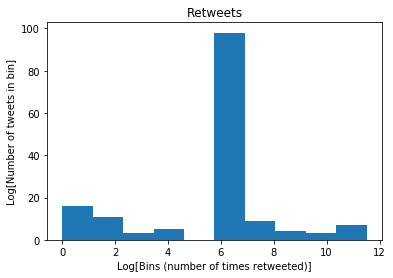

In [22]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

logcounts = [log(count) for count, _, _ in retweets]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well. Try it back on
# Example 13 and see if it helps.

plt.hist(logcounts)
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')

print (logcounts)